In [37]:
import os
import openai
import panel as pn 
pn.extension()

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) 

openai.api_key  = os.environ['OPENAI_API_KEY']

In [38]:

client = openai.OpenAI()
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0
    )
    return response.choices[0].message.content

def get_completion_from_messages(messages, 
                                 model="gpt-3.5-turbo", 
                                 temperature=0, 
                                 max_tokens=500):
    response = openai.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
        max_tokens=max_tokens, # the maximum number of tokens the model can ouptut 
    )
    return response.choices[0].message.content

In [39]:
# product information
products = {
    "TechPro Ultrabook": {
        "name": "TechPro Ultrabook",
        "category": "Computers and Laptops",
        "brand": "TechPro",
        "model_number": "TP-UB100",
        "warranty": "1 year",
        "rating": 4.5,
        "features": ["13.3-inch display", "8GB RAM", "256GB SSD", "Intel Core i5 processor"],
        "description": "A sleek and lightweight ultrabook for everyday use.",
        "price": 799.99
    },
    "BlueWave Gaming Laptop": {
        "name": "BlueWave Gaming Laptop",
        "category": "Computers and Laptops",
        "brand": "BlueWave",
        "model_number": "BW-GL200",
        "warranty": "2 years",
        "rating": 4.7,
        "features": ["15.6-inch display", "16GB RAM", "512GB SSD", "NVIDIA GeForce RTX 3060"],
        "description": "A high-performance gaming laptop for an immersive experience.",
        "price": 1199.99
    },
    "PowerLite Convertible": {
        "name": "PowerLite Convertible",
        "category": "Computers and Laptops",
        "brand": "PowerLite",
        "model_number": "PL-CV300",
        "warranty": "1 year",
        "rating": 4.3,
        "features": ["14-inch touchscreen", "8GB RAM", "256GB SSD", "360-degree hinge"],
        "description": "A versatile convertible laptop with a responsive touchscreen.",
        "price": 699.99
    },
    "TechPro Desktop": {
        "name": "TechPro Desktop",
        "category": "Computers and Laptops",
        "brand": "TechPro",
        "model_number": "TP-DT500",
        "warranty": "1 year",
        "rating": 4.4,
        "features": ["Intel Core i7 processor", "16GB RAM", "1TB HDD", "NVIDIA GeForce GTX 1660"],
        "description": "A powerful desktop computer for work and play.",
        "price": 999.99
    },
    "BlueWave Chromebook": {
        "name": "BlueWave Chromebook",
        "category": "Computers and Laptops",
        "brand": "BlueWave",
        "model_number": "BW-CB100",
        "warranty": "1 year",
        "rating": 4.1,
        "features": ["11.6-inch display", "4GB RAM", "32GB eMMC", "Chrome OS"],
        "description": "A compact and affordable Chromebook for everyday tasks.",
        "price": 249.99
    },
    "SmartX ProPhone": {
        "name": "SmartX ProPhone",
        "category": "Smartphones and Accessories",
        "brand": "SmartX",
        "model_number": "SX-PP10",
        "warranty": "1 year",
        "rating": 4.6,
        "features": ["6.1-inch display", "128GB storage", "12MP dual camera", "5G"],
        "description": "A powerful smartphone with advanced camera features.",
        "price": 899.99
    },
    "MobiTech PowerCase": {
        "name": "MobiTech PowerCase",
        "category": "Smartphones and Accessories",
        "brand": "MobiTech",
        "model_number": "MT-PC20",
        "warranty": "1 year",
        "rating": 4.3,
        "features": ["5000mAh battery", "Wireless charging", "Compatible with SmartX ProPhone"],
        "description": "A protective case with built-in battery for extended usage.",
        "price": 59.99
    },
    "SmartX MiniPhone": {
        "name": "SmartX MiniPhone",
        "category": "Smartphones and Accessories",
        "brand": "SmartX",
        "model_number": "SX-MP5",
        "warranty": "1 year",
        "rating": 4.2,
        "features": ["4.7-inch display", "64GB storage", "8MP camera", "4G"],
        "description": "A compact and affordable smartphone for basic tasks.",
        "price": 399.99
    },
    "MobiTech Wireless Charger": {
        "name": "MobiTech Wireless Charger",
        "category": "Smartphones and Accessories",
        "brand": "MobiTech",
        "model_number": "MT-WC10",
        "warranty": "1 year",
        "rating": 4.5,
        "features": ["10W fast charging", "Qi-compatible", "LED indicator", "Compact design"],
        "description": "A convenient wireless charger for a clutter-free workspace.",
        "price": 29.99
    },
    "SmartX EarBuds": {
        "name": "SmartX EarBuds",
        "category": "Smartphones and Accessories",
        "brand": "SmartX",
        "model_number": "SX-EB20",
        "warranty": "1 year",
        "rating": 4.4,
        "features": ["True wireless", "Bluetooth 5.0", "Touch controls", "24-hour battery life"],
        "description": "Experience true wireless freedom with these comfortable earbuds.",
        "price": 99.99
    },

    "CineView 4K TV": {
        "name": "CineView 4K TV",
        "category": "Televisions and Home Theater Systems",
        "brand": "CineView",
        "model_number": "CV-4K55",
        "warranty": "2 years",
        "rating": 4.8,
        "features": ["55-inch display", "4K resolution", "HDR", "Smart TV"],
        "description": "A stunning 4K TV with vibrant colors and smart features.",
        "price": 599.99
    },
    "SoundMax Home Theater": {
        "name": "SoundMax Home Theater",
        "category": "Televisions and Home Theater Systems",
        "brand": "SoundMax",
        "model_number": "SM-HT100",
        "warranty": "1 year",
        "rating": 4.4,
        "features": ["5.1 channel", "1000W output", "Wireless subwoofer", "Bluetooth"],
        "description": "A powerful home theater system for an immersive audio experience.",
        "price": 399.99
    },
    "CineView 8K TV": {
        "name": "CineView 8K TV",
        "category": "Televisions and Home Theater Systems",
        "brand": "CineView",
        "model_number": "CV-8K65",
        "warranty": "2 years",
        "rating": 4.9,
        "features": ["65-inch display", "8K resolution", "HDR", "Smart TV"],
        "description": "Experience the future of television with this stunning 8K TV.",
        "price": 2999.99
    },
    "SoundMax Soundbar": {
        "name": "SoundMax Soundbar",
        "category": "Televisions and Home Theater Systems",
        "brand": "SoundMax",
        "model_number": "SM-SB50",
        "warranty": "1 year",
        "rating": 4.3,
        "features": ["2.1 channel", "300W output", "Wireless subwoofer", "Bluetooth"],
        "description": "Upgrade your TV's audio with this sleek and powerful soundbar.",
        "price": 199.99
    },
    "CineView OLED TV": {
        "name": "CineView OLED TV",
        "category": "Televisions and Home Theater Systems",
        "brand": "CineView",
        "model_number": "CV-OLED55",
        "warranty": "2 years",
        "rating": 4.7,
        "features": ["55-inch display", "4K resolution", "HDR", "Smart TV"],
        "description": "Experience true blacks and vibrant colors with this OLED TV.",
        "price": 1499.99
    },

    "GameSphere X": {
        "name": "GameSphere X",
        "category": "Gaming Consoles and Accessories",
        "brand": "GameSphere",
        "model_number": "GS-X",
        "warranty": "1 year",
        "rating": 4.9,
        "features": ["4K gaming", "1TB storage", "Backward compatibility", "Online multiplayer"],
        "description": "A next-generation gaming console for the ultimate gaming experience.",
        "price": 499.99
    },
    "ProGamer Controller": {
        "name": "ProGamer Controller",
        "category": "Gaming Consoles and Accessories",
        "brand": "ProGamer",
        "model_number": "PG-C100",
        "warranty": "1 year",
        "rating": 4.2,
        "features": ["Ergonomic design", "Customizable buttons", "Wireless", "Rechargeable battery"],
        "description": "A high-quality gaming controller for precision and comfort.",
        "price": 59.99
    },
    "GameSphere Y": {
        "name": "GameSphere Y",
        "category": "Gaming Consoles and Accessories",
        "brand": "GameSphere",
        "model_number": "GS-Y",
        "warranty": "1 year",
        "rating": 4.8,
        "features": ["4K gaming", "500GB storage", "Backward compatibility", "Online multiplayer"],
        "description": "A compact gaming console with powerful performance.",
        "price": 399.99
    },
    "ProGamer Racing Wheel": {
        "name": "ProGamer Racing Wheel",
        "category": "Gaming Consoles and Accessories",
        "brand": "ProGamer",
        "model_number": "PG-RW200",
        "warranty": "1 year",
        "rating": 4.5,
        "features": ["Force feedback", "Adjustable pedals", "Paddle shifters", "Compatible with GameSphere X"],
        "description": "Enhance your racing games with this realistic racing wheel.",
        "price": 249.99
    },
    "GameSphere VR Headset": {
        "name": "GameSphere VR Headset",
        "category": "Gaming Consoles and Accessories",
        "brand": "GameSphere",
        "model_number": "GS-VR",
        "warranty": "1 year",
        "rating": 4.6,
        "features": ["Immersive VR experience", "Built-in headphones", "Adjustable headband", "Compatible with GameSphere X"],
        "description": "Step into the world of virtual reality with this comfortable VR headset.",
        "price": 299.99
    },

    "AudioPhonic Noise-Canceling Headphones": {
        "name": "AudioPhonic Noise-Canceling Headphones",
        "category": "Audio Equipment",
        "brand": "AudioPhonic",
        "model_number": "AP-NC100",
        "warranty": "1 year",
        "rating": 4.6,
        "features": ["Active noise-canceling", "Bluetooth", "20-hour battery life", "Comfortable fit"],
        "description": "Experience immersive sound with these noise-canceling headphones.",
        "price": 199.99
    },
    "WaveSound Bluetooth Speaker": {
        "name": "WaveSound Bluetooth Speaker",
        "category": "Audio Equipment",
        "brand": "WaveSound",
        "model_number": "WS-BS50",
        "warranty": "1 year",
        "rating": 4.5,
        "features": ["Portable", "10-hour battery life", "Water-resistant", "Built-in microphone"],
        "description": "A compact and versatile Bluetooth speaker for music on the go.",
        "price": 49.99
    },
    "AudioPhonic True Wireless Earbuds": {
        "name": "AudioPhonic True Wireless Earbuds",
        "category": "Audio Equipment",
        "brand": "AudioPhonic",
        "model_number": "AP-TW20",
        "warranty": "1 year",
        "rating": 4.4,
        "features": ["True wireless", "Bluetooth 5.0", "Touch controls", "18-hour battery life"],
        "description": "Enjoy music without wires with these comfortable true wireless earbuds.",
        "price": 79.99
    },
    "WaveSound Soundbar": {
        "name": "WaveSound Soundbar",
        "category": "Audio Equipment",
        "brand": "WaveSound",
        "model_number": "WS-SB40",
        "warranty": "1 year",
        "rating": 4.3,
        "features": ["2.0 channel", "80W output", "Bluetooth", "Wall-mountable"],
        "description": "Upgrade your TV's audio with this slim and powerful soundbar.",
        "price": 99.99
    },
    "AudioPhonic Turntable": {
        "name": "AudioPhonic Turntable",
        "category": "Audio Equipment",
        "brand": "AudioPhonic",
        "model_number": "AP-TT10",
        "warranty": "1 year",
        "rating": 4.2,
        "features": ["3-speed", "Built-in speakers", "Bluetooth", "USB recording"],
        "description": "Rediscover your vinyl collection with this modern turntable.",
        "price": 149.99
    },

    "FotoSnap DSLR Camera": {
        "name": "FotoSnap DSLR Camera",
        "category": "Cameras and Camcorders",
        "brand": "FotoSnap",
        "model_number": "FS-DSLR200",
        "warranty": "1 year",
        "rating": 4.7,
        "features": ["24.2MP sensor", "1080p video", "3-inch LCD", "Interchangeable lenses"],
        "description": "Capture stunning photos and videos with this versatile DSLR camera.",
        "price": 599.99
    },
    "ActionCam 4K": {
        "name": "ActionCam 4K",
        "category": "Cameras and Camcorders",
        "brand": "ActionCam",
        "model_number": "AC-4K",
        "warranty": "1 year",
        "rating": 4.4,
        "features": ["4K video", "Waterproof", "Image stabilization", "Wi-Fi"],
        "description": "Record your adventures with this rugged and compact 4K action camera.",
        "price": 299.99
    },
    "FotoSnap Mirrorless Camera": {
        "name": "FotoSnap Mirrorless Camera",
        "category": "Cameras and Camcorders",
        "brand": "FotoSnap",
        "model_number": "FS-ML100",
        "warranty": "1 year",
        "rating": 4.6,
        "features": ["20.1MP sensor", "4K video", "3-inch touchscreen", "Interchangeable lenses"],
        "description": "A compact and lightweight mirrorless camera with advanced features.",
        "price": 799.99
    },
    "ZoomMaster Camcorder": {
        "name": "ZoomMaster Camcorder",
        "category": "Cameras and Camcorders",
        "brand": "ZoomMaster",
        "model_number": "ZM-CM50",
        "warranty": "1 year",
        "rating": 4.3,
        "features": ["1080p video", "30x optical zoom", "3-inch LCD", "Image stabilization"],
        "description": "Capture life's moments with this easy-to-use camcorder.",
        "price": 249.99
    },
    "FotoSnap Instant Camera": {
        "name": "FotoSnap Instant Camera",
        "category": "Cameras and Camcorders",
        "brand": "FotoSnap",
        "model_number": "FS-IC10",
        "warranty": "1 year",
        "rating": 4.1,
        "features": ["Instant prints", "Built-in flash", "Selfie mirror", "Battery-powered"],
        "description": "Create instant memories with this fun and portable instant camera.",
        "price": 69.99
    }
}

In [40]:
import json 

def get_product_by_name(name):
    return products.get(name, None)

def get_products_by_category(category):
    return [product for product in products.values() if product["category"] == category]

def read_string_to_list(input_string):
    if input_string is None or len(input_string) == 0:
        return None

    try:
        input_string = input_string.replace("'", "\"")  # Replace single quotes with double quotes for valid JSON
        data = json.loads(input_string)
        return data
    except json.JSONDecodeError:
        return None

def generate_output_string(data_list):
    output_string = ""

    if data_list is None:
        return output_string

    for data in data_list:
        try:
            if "products" in data:
                products_list = data["products"]
                for product_name in products_list:
                    product = get_product_by_name(product_name)
                    if product:
                        output_string += json.dumps(product, indent=4) + "\n"
                    else:
                        print(f"Error: Product '{product_name}' not found")
            elif "category" in data:
                category_name = data["category"]
                category_products = get_products_by_category(category_name)
                for product in category_products:
                    output_string += json.dumps(product, indent=4) + "\n"
            else:
                print("Error: Invalid object format")
        except Exception as e:
            print(f"Error: {e}")

def find_category_and_product_only(user_input, products):
    data_list = read_string_to_list(user_input)
    output_string = ""

    if data_list is None:
        return output_string

    for data in data_list:
        try:
            if "products" in data:
                products_list = data["products"]
                for product_name in products_list:
                    product = get_product_by_name(product_name, products)
                    if product:
                        output_string += json.dumps(product, indent=4) + "\n"
                    else:
                        print(f"Error: Product '{product_name}' not found")
            elif "category" in data:
                category_name = data["category"]
                category_products = get_products_by_category(category_name, products)
                for product in category_products:
                    output_string += json.dumps(product, indent=4) + "\n"
            else:
                print("Error: Invalid object format")
        except Exception as e:
            print(f"Error: {e}")

    return output_string

System of chained prompts for processing the user query  

In [41]:
def process_user_message(user_input, all_messages, debug=True):
    delimiter = "```"
    
    # Step 1: Check input to see if it flags the Moderation API or is a prompt injection
    response = openai.moderations.create(input=user_input)
    moderation_output = response.model_dump()
    moderation_output = moderation_output["results"][0]
    if moderation_output["flagged"]:
        print("Step 1: Input flagged by Moderation API.")
        return "Sorry, we cannot process this request."

    if debug: print("Step 1: Input passed moderation check.")
    
    category_and_product_response = find_category_and_product_only(user_input,products)
    #print(print(category_and_product_response)
    # Step 2: Extract the list of products
    category_and_product_list = read_string_to_list(category_and_product_response)
    #print(category_and_product_list)

    if debug: print("Step 2: Extracted list of products.")

    # Step 3: If products are found, look them up
    product_information = generate_output_string(category_and_product_list)
    if debug: print("Step 3: Looked up product information.")

    # Step 4: Answer the user question
    system_message = f"""
    You are a customer service assistant for a large electronic store. \
    Respond in a friendly and helpful tone, with concise answers. \
    Make sure to ask the user relevant follow-up questions.
    """
    messages = [
        {'role': 'system', 'content': system_message},
        {'role': 'user', 'content': f"{delimiter}{user_input}{delimiter}"},
        {'role': 'assistant', 'content': f"Relevant product information:\n{product_information}"}
    ]

    final_response = get_completion_from_messages(all_messages + messages)
    if debug:print("Step 4: Generated response to user question.")
    all_messages = all_messages + messages[1:]

    # Step 5: Put the answer through the Moderation API
    response = openai.moderations.create(input=final_response)
    moderation_output = response.model_dump()
    moderation_output = moderation_output["results"][0]

    if moderation_output["flagged"]:
        if debug: print("Step 5: Response flagged by Moderation API.")
        return "Sorry, we cannot provide this information."

    if debug: print("Step 5: Response passed moderation check.")

    # Step 6: Ask the model if the response answers the initial user query well
    user_message = f"""
    Customer message: {delimiter}{user_input}{delimiter}
    Agent response: {delimiter}{final_response}{delimiter}

    Does the response sufficiently answer the question?
    """
    messages = [
        {'role': 'system', 'content': system_message},
        {'role': 'user', 'content': user_message}
    ]
    evaluation_response = get_completion_from_messages(messages)
    if debug: print("Step 6: Model evaluated the response.")

    # Step 7: If yes, use this answer; if not, say that you will connect the user to a human
    if "Y" in evaluation_response:  # Using "in" instead of "==" to be safer for model output variation (e.g., "Y." or "Yes")
        if debug: print("Step 7: Model approved the response.")
        return final_response, all_messages
    else:
        if debug: print("Step 7: Model disapproved the response.")
        neg_str = "I'm unable to provide the information you're looking for. I'll connect you with a human representative for further assistance."
        return neg_str, all_messages

user_input = "tell me about the smartx pro phone and the fotosnap camera, the dslr one. Also what tell me about your tvs"
response,_ = process_user_message(user_input,[])
print(response)

Step 1: Input passed moderation check.
Step 2: Extracted list of products.
Step 3: Looked up product information.
Step 4: Generated response to user question.
Step 5: Response passed moderation check.
Step 6: Model evaluated the response.
Step 7: Model approved the response.
- The SmartX Pro phone is a high-performance smartphone with a powerful processor, advanced camera features, and a sleek design. It offers a smooth user experience and great connectivity options. Do you have any specific questions about its features or specifications?

- The FotoSnap camera is a DSLR camera known for its professional-grade image quality and versatility. It offers manual controls for advanced photographers and produces stunning photos. Are you looking for any specific details about its resolution, lens options, or shooting modes?

- Our range of TVs includes various sizes and features such as 4K resolution, smart TV capabilities, and HDR support. Do you have a particular size or feature in mind for 

In [42]:
panels = [] # collect display 

context = [ {'role':'system', 'content':"You are Service Assistant"} ]  

inp = pn.widgets.TextInput( placeholder='How may I help you?')
button_conversation = pn.widgets.Button(name="Service Assistant")

gif_url = r"D:\Personal\Academics\UTA\4th Semester\Building Systems with Chatgpt API\nikotronics_animation.gif"  # Replace this URL with the URL of your GIF
logo = pn.pane.GIF(gif_url,align='center')

gif_url1 = r"D:\Personal\Academics\UTA\4th Semester\Building Systems with Chatgpt API\chatbot.gif"  # Replace this URL with the URL of your GIF
logo1 = pn.pane.GIF(gif_url1, width=200, height=200, align='center')

def collect_messages(debug=False):
    user_input = inp.value
    if debug: print(f"User Input = {user_input}")
    if user_input == "":
        return
    inp.value = ''
    global context
    #response, context = process_user_message(user_input, context, utils.get_products_and_category(),debug=True)
    response, context = process_user_message(user_input, context, debug=False)
    context.append({'role':'assistant', 'content':f"{response}"})
    panels.append(
        pn.Row('User:', pn.pane.Markdown(user_input, width=600)))
    panels.append(
        pn.Row('Assistant:', pn.pane.Markdown(response, styles={'background-color': '#F6F6F6'})))
 
    return pn.Column(*panels)

In [ ]:
interactive_conversation = pn.bind(collect_messages, button_conversation)
input_layout = pn.Column(
    pn.Row(inp, align='center'),  # Align input text to center
    pn.Row(button_conversation, align='center'),  # Align button to center
    sizing_mode='stretch_width'  # Stretch the width to fit the window
)
dashboard = pn.Column(
    pn.Row(logo, align= 'center'),
    pn.Row(logo1, align= 'center'),
    pn.Spacer(),
    pn.panel(interactive_conversation, loading_indicator=True,width=1000, align='center'),
    input_layout,
    sizing_mode='stretch_width' 
)

dashboard.height_policy = 'max'
dashboard.show()

Launching server at http://localhost:62983


2024-02-19 23:08:28.567 200 GET / (::1) 126.32ms
2024-02-19 23:08:28.611 200 GET /static/js/bokeh-gl.min.js?v=6721b980580fb8317f83927f85b92aea8fec9bcd94ff58f895f85e5617987ee82f89b5da322b9cdb482c46ac2bd3442466f7ce2484bae8b414318a7ace09e901 (::1) 5.00ms
2024-02-19 23:08:28.615 200 GET /static/js/bokeh-widgets.min.js?v=31de1843fe9e438f1829e492effd36329ababde542605297701ad7d96d2fc86464984340ba7645878652d1dccf43f535033e4cc55a45008c5bba7c20ae4577b9 (::1) 6.98ms
2024-02-19 23:08:28.619 200 GET /static/js/bokeh-tables.min.js?v=755762f1b7b2263c503b8b87d5b02c242930ea7020b58deba3f8a9850aeeb96f21cd9c73e8ba792fce5be3489a32a4e3b852fe9eef1b3915ca60b08e349fe2fd (::1) 10.98ms
2024-02-19 23:08:28.624 200 GET /static/extensions/panel/panel.min.js?v=4dc754e770a2aaf1bd357f00e2c1ffb347b27f3b739a37791169825d30b0a501 (::1) 14.02ms
2024-02-19 23:08:28.628 200 GET /static/js/bokeh.min.js?v=15dc4235f19f49742da0da503e059b08fd36649cd0c5a3e570cb2d53c86393c9b8ede7d19c9e3ab6da35adec3869a0b95f1a8d48fa2a7ebc6a45c69113c

MovieWriter imagemagick unavailable; using Pillow instead.


Classy GIF animation created! Check out 'nikotronics_animation.gif'.


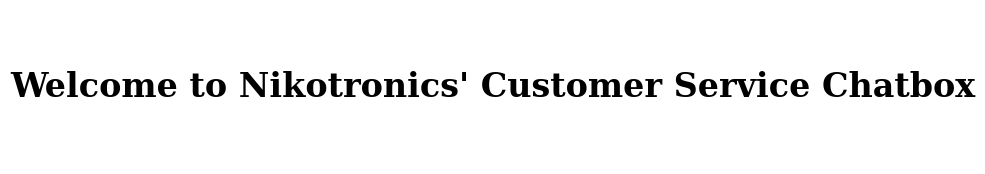

In [50]:


# Python code to create the GIF animation
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 2))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis("off")

# Text to reveal
text = "Welcome to Nikotronics' Customer Service Chatbox"
font_properties = {"family": "serif", "weight": "bold", "size": 24}

# Initialize the text
txt = ax.text(0.5, 0.5, "", ha="center", va="center", fontdict=font_properties)

# Animation function
def animate(frame):
    txt.set_text(text[:frame + 5])
    return txt,

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=len(text), interval=1000, blit=True)

# Save the animation as a GIF
ani.save("nikotronics_animation.gif", writer="imagemagick", fps=7)

print("Classy GIF animation created! Check out 'nikotronics_animation.gif'.")